In [1]:
!pip install pyspark
!pip install bnlp_toolkit
!pip install nlu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=cac087d9cda8f26a82f5b09b34a8a6c79ab597bf4da69040ac37a0fa6f6ed4f2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
  Obtaining dependency information for bnlp_toolkit from https://files.pythonhosted.org/packages/af/99/5d688fc2e5f6494d6c0a4e6bcdc8192266869caeef3b41dbc3dc8358616d/bnlp_toolkit-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for wcwidth<0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import BengaliCorpus as corpus
from bnlp import CleanText
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer
import nlu

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv")

In [4]:
train_df.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [5]:
train_df.dropna(inplace=True)

In [6]:
longest_string = max(train_df["Data"], key=len)
print(len(longest_string))

372


In [7]:
clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

train_df['Data'] = train_df['Data'].apply(clean_text)

In [8]:
longest_string = max(train_df["Data"], key=len)
print(len(longest_string))

372


In [9]:
def create_lemma(text):
     return " ".join(text)

In [10]:
# text_list = train_df["Data"].tolist()
# lemmatized_result = nlu.load('bn.lemma').predict(text_list, output_level = "document")
# lemmatized_result

In [11]:
# # Extracting lemmatized text from the results
# lemmatized_text_list = lemmatized_result['lem']

# # Adding lemmatized text as a new column to train_df
# train_df['Lemmatized_Text'] = lemmatized_text_list

# train_df['Lemmatized_Text']=train_df['Lemmatized_Text'].apply(create_lemma)

In [12]:
# train_df

In [13]:
# longest_string = max(train_df["Lemmatized_Text"], key=len)
# print(len(longest_string))

In [14]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(train_df['Data'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00005 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
007            0.000042
01614000789    0.000046
01618804890    0.000046
01625959562    0.000042
01681003067    0.000034
                 ...   
৮৫             0.000029
৮৫৭            0.000047
৮৭             0.000047
৮৯             0.000030
৯৬             0.000042
Length: 870, dtype: float64


In [15]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove less important words
def remove_less_important_words(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

# Apply the function to 'text' column in the DataFrame
train_df['Data'] = train_df['Data'].apply(remove_less_important_words)

In [16]:
longest_string = max(train_df["Data"], key=len)
print(len(longest_string))

369


In [17]:
train_df["Label"].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [18]:
##For test dataset

In [19]:
test_df = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Val.csv")

In [20]:
test_df.head()

,Data,Label
0,আর আমার খুবেই আনন্দ লাকছে ভাইটি চাকরি পেয়েছে,1
1,ভাই আমাদের আগের মেয়র আনিচুল হক নাই যে আমাদের ক...,2
2,আমি মার্ক ওয়েন আর সনির বিশাল ভক্ত । একটা সময় ভ...,1
3,৩ মাস না যেতেই একেকজন ফুলে ফেপে আলুর দম,2
4,"বাংলাদেশের পুলিশ হলো নিরীহ মানুষের যম , আর অত্...",2


In [21]:
test_df.dropna(inplace=True)

In [22]:
longest_string = max(test_df["Data"], key=len)
print(len(longest_string))

288


In [23]:
clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

test_df['Data'] = test_df['Data'].apply(clean_text)

In [24]:
longest_string = max(test_df["Data"], key=len)
print(len(longest_string))

292


In [25]:
def create_lemma(text):
     return " ".join(text)

In [26]:
# text_list = test_df["Data"].tolist()
# lemmatized_result = nlu.load('bn.lemma').predict(text_list, output_level = "document")
# lemmatized_result

In [27]:
# # Extracting lemmatized text from the results
# lemmatized_text_list = lemmatized_result['lem']

# # Adding lemmatized text as a new column to train_df
# test_df['Lemmatized_Text'] = lemmatized_text_list

# test_df['Lemmatized_Text']=test_df['Lemmatized_Text'].apply(create_lemma)

In [28]:
test_df

,Data,Label
0,আর আমার খুবেই আনন্দ লাকছে ভাইটি চাকরি পেয়েছে,1
1,ভাই আমাদের আগের মেয়র আনিচুল হক নাই যে আমাদের ...,2
2,আমি মার্ক ওয়েন আর সনির বিশাল ভক্ত । একটা সময়...,1
3,৩ মাস না যেতেই একেকজন ফুলে ফেপে আলুর দম,2
4,"বাংলাদেশের পুলিশ হলো নিরীহ মানুষের যম , আর অত্...",2
...,...,...
1562,আর বিচার হবে বলে মনে হয় না,2
1563,"ভাই রাতে গেলে পাবেন , ০১৮৬২২৮৪৪৯৫ অথবা ০১৮৬২৮০...",1
1564,আমাকে যে দিন ( যেই তারিখ এ ) ডক্টর এ্যাপয়েনমে...,1
1565,আরে ভাই এখান থেকে তো রাজনীতি করে বড় হচ্ছে আর ...,2


In [29]:
# longest_string = max(test_df["Lemmatized_Text"], key=len)
# print(len(longest_string))

In [30]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(test_df['Data'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00005 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
Series([], dtype: float64)


In [31]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove less important words
def remove_less_important_words(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

# Apply the function to 'text' column in the DataFrame
test_df['Data'] = test_df['Data'].apply(remove_less_important_words)

In [32]:
longest_string = max(test_df["Data"], key=len)
print(len(longest_string))

295


In [33]:
test_df["Label"].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [34]:
train_df.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো ত...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ...,0


In [35]:
test_df.head()

,Data,Label
0,আর আমার খুবেই আনন্দ লাকছে ভাইটি চাকরি পেয়েছে,1
1,ভাই আমাদের আগের মেয়র আনিচুল হক নাই যে আমাদের ...,2
2,আমি মার্ক ওয়েন আর সনির বিশাল ভক্ত । একটা সময়...,1
3,৩ মাস না যেতেই একেকজন ফুলে ফেপে আলুর দম,2
4,"বাংলাদেশের পুলিশ হলো নিরীহ মানুষের যম , আর অত্...",2


In [36]:
# from sklearn.model_selection import train_test_split
train = train_df['Data'].values.tolist()
test = test_df['Data'].values.tolist()
train_cluster_id = train_df['Label'].tolist()
test_cluster_id = test_df['Label'].tolist()

In [37]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [38]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 47.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 59.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 18.5

In [39]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [40]:
y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]

In [41]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [42]:
print(trn)

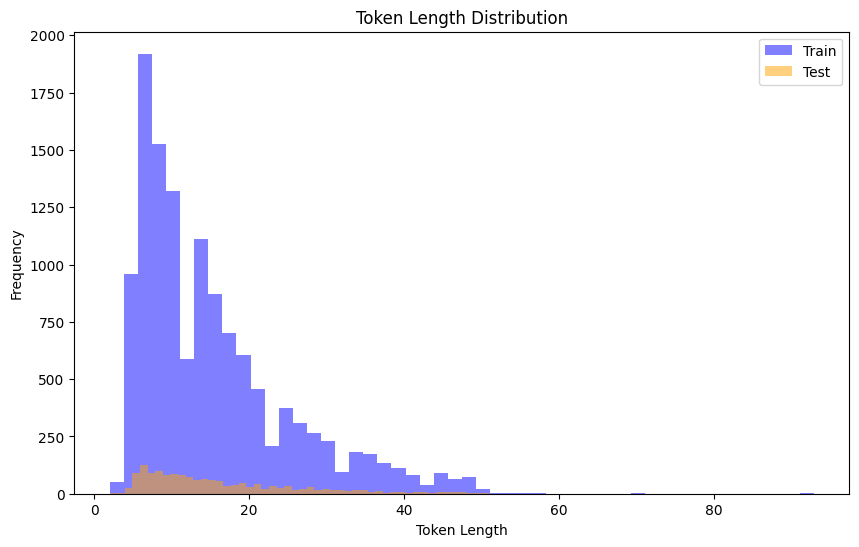

In [43]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [44]:
model = t.get_classifier()

In [45]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

In [46]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [47]:
history = learner.fit_onecycle (1e-4, 5, callbacks=[early_stopping])



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
786/786 [==============================] - 865s 1s/step - loss: 0.7757 - accuracy: 0.6640 - val_loss: 0.6493 - val_accuracy: 0.7218
Epoch 2/5
786/786 [==============================] - 836s 1s/step - loss: 0.6037 - accuracy: 0.7530 - val_loss: 0.6604 - val_accuracy: 0.7269
Epoch 3/5
786/786 [==============================] - 836s 1s/step - loss: 0.4933 - accuracy: 0.8060 - val_loss: 0.6739 - val_accuracy: 0.7518
Epoch 4/5
786/786 [==============================] - 836s 1s/step - loss: 0.2913 - accuracy: 0.8938 - val_loss: 0.7385 - val_accuracy: 0.7543
Epoch 5/5
786/786 [==============================] - 837s 1s/step - loss: 0.1188 - accuracy: 0.9635 - val_loss: 0.8962 - val_accuracy: 0.7511


In [48]:
# Save the trained model
learner.save_model('/kaggle/output/clean_text_and_tf-idf.zip')

In [49]:
classes=t.get_classes()

In [50]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 9s 130ms/step
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       354
           1       0.76      0.82      0.79       623
           2       0.84      0.80      0.82       590

    accuracy                           0.75      1567
   macro avg       0.73      0.72      0.72      1567
weighted avg       0.75      0.75      0.75      1567

